In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score ,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import xgboost
from xgboost import XGBRegressor

Loading Dataset

In [7]:
nRowsRead = 1259

df1 = pd.read_csv('MagicBricks.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MagicBricks.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1259 rows and 11 columns


In [8]:
df1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


**EDA**

In [9]:
df1.shape


(1259, 11)

In [10]:
df1.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [11]:
df1.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


**Handling null values**

In [13]:
df1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1254,False
1255,False
1256,False
1257,False


No duplicate values in the dataset

In [14]:
df1.isnull().sum()

,0
Area,0
BHK,0
Bathroom,2
Furnishing,5
Locality,0
Parking,33
Price,0
Status,0
Transaction,0
Type,5


The relation between 'Area','Price' and 'Per_Sqft', which is 'Per_Sqft' = 'Price'/'Area'.
Since there are 241 null values , we can eliminate 'Per_Sqft'

In [15]:
df1.drop('Per_Sqft',axis=1,inplace=True)

In [16]:
df1.drop('Locality',axis=1,inplace=True)

In [17]:
df1.Bathroom.fillna(df1.Bathroom.median(),inplace=True)
df1.Type.fillna('Apartment',inplace=True)
df1.Furnishing.fillna('Semi-Furnished',inplace=True)

In [18]:
df1.Parking.fillna(0,inplace=True)

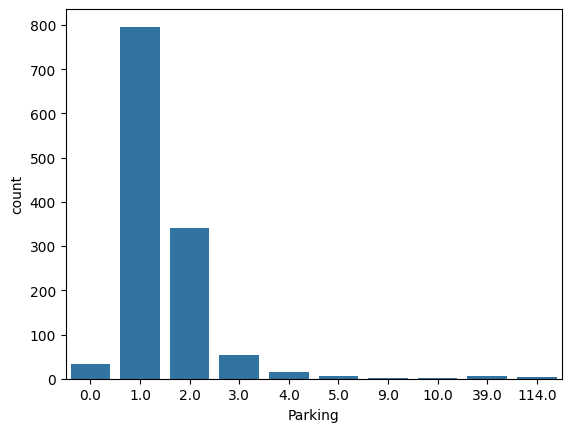

In [19]:
sns.countplot(x ='Parking', data = df1)
plt.show()

39 and 114 parking lots are definitely outliers

In [20]:
df1.drop(df1[df1.Parking > 38].index, inplace=True)

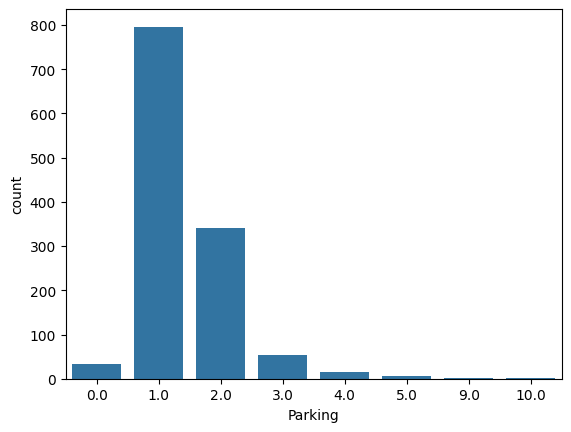

In [21]:
sns.countplot(x ='Parking', data = df1)
plt.show()

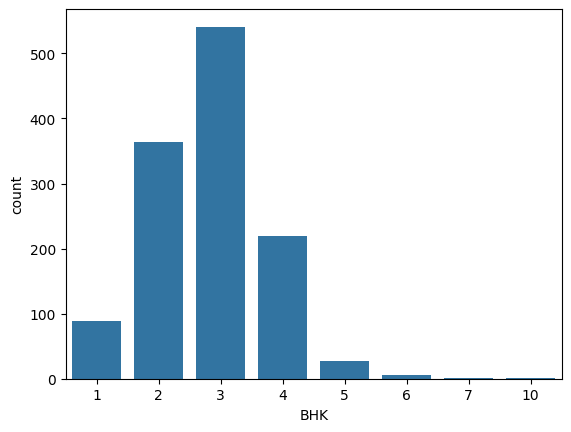

In [22]:
sns.countplot(x='BHK',data=df1)
plt.show()


In [23]:
df1['BHK'].value_counts()

,count
BHK,
3,541
2,364
4,220
1,89
5,27
6,6
7,1
10,1


In [24]:
df1.drop(df1[df1.BHK > 5].index, inplace=True)

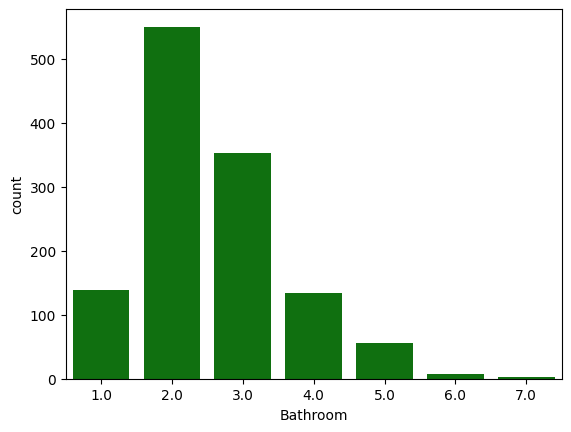

In [25]:
sns.countplot(x='Bathroom',data=df1,color='g')
plt.show()

In [26]:
df1.drop(df1[df1.Bathroom > 5].index, inplace=True)

<Axes: xlabel='Furnishing'>

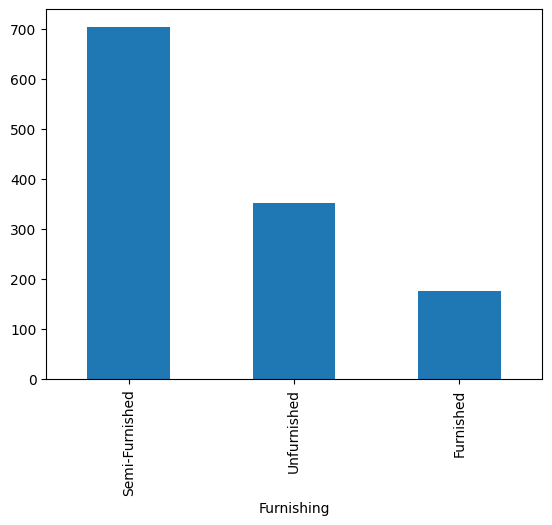

In [27]:
df1.Furnishing.value_counts().plot.bar()

<ipython-input-28-7ce619a9f0e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1.Furnishing,y=df1.Price,palette=palette)


<Axes: xlabel='Furnishing', ylabel='Price'>

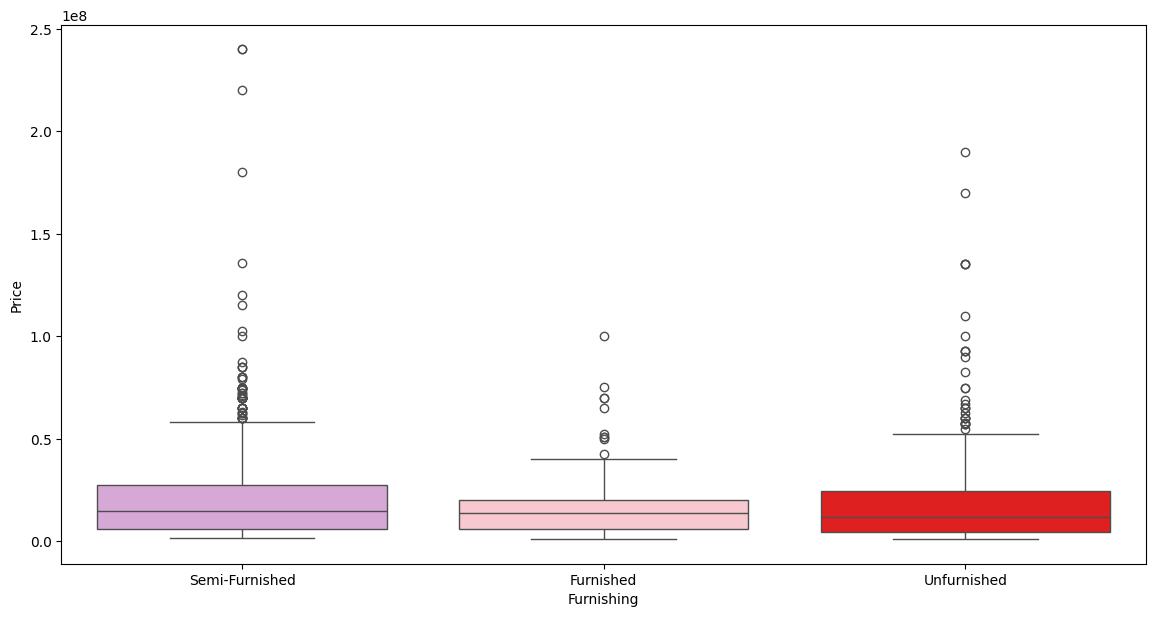

In [28]:
plt.figure(figsize=(14,7))
palette=['plum','pink','r']
sns.boxplot(x=df1.Furnishing,y=df1.Price,palette=palette)

<ipython-input-29-15f4178b99a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status',data=df1,palette=palette)


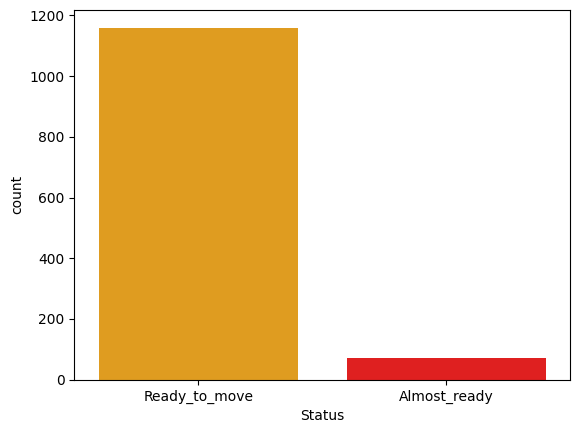

In [29]:
palette=['orange','r']
sns.countplot(x='Status',data=df1,palette=palette)
plt.show()

<ipython-input-30-3959abcd5e96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type',data=df1,palette=palette)


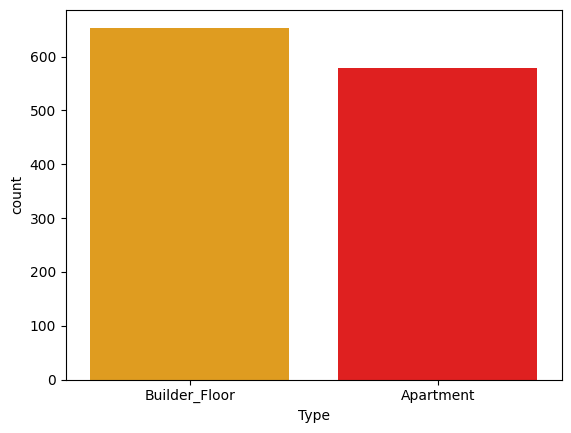

In [30]:
palette=['orange','r']
sns.countplot(x='Type',data=df1,palette=palette)
plt.show()

<ipython-input-31-097ac90fd2b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transaction',y='Price',data=df1,palette=palette)


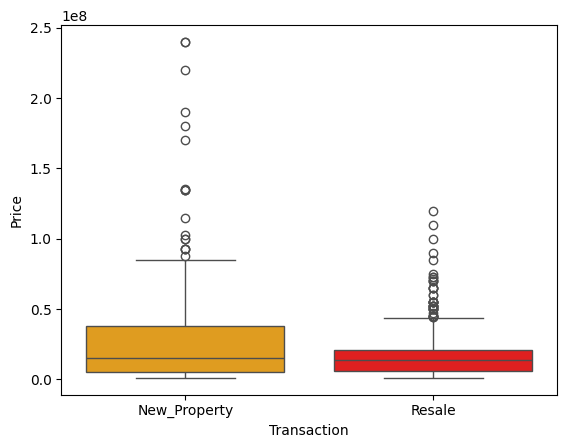

In [31]:
palette=['orange','r']
sns.boxplot(x='Transaction',y='Price',data=df1,palette=palette)
plt.show()

<Axes: xlabel='Area', ylabel='Price'>

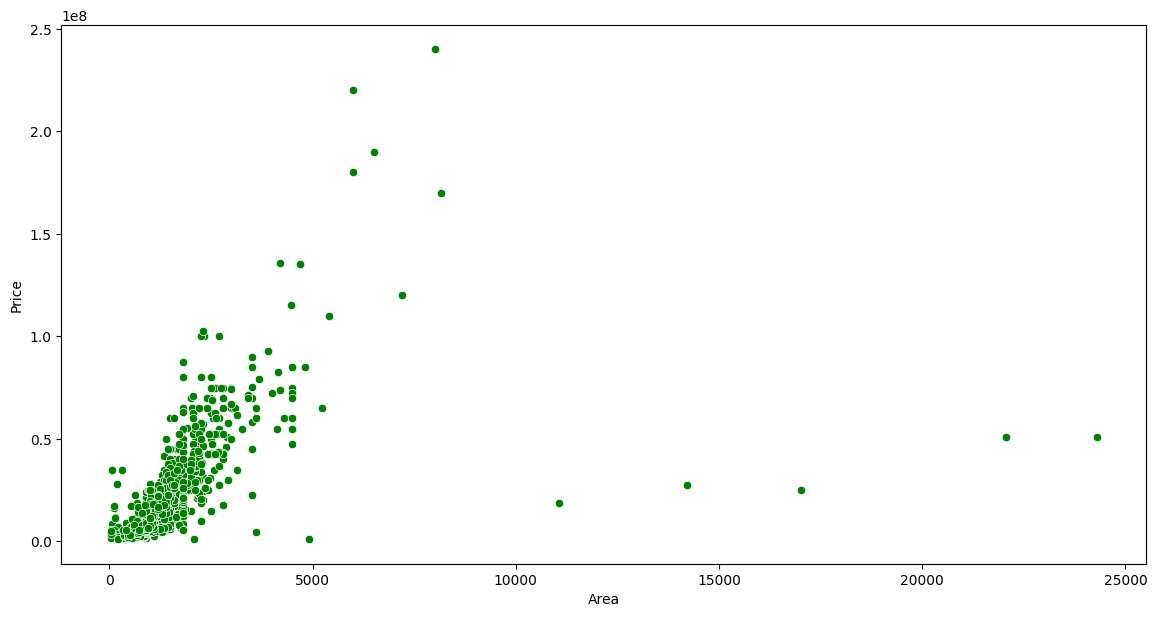

In [32]:

plt.figure(figsize=(14,7))
sns.scatterplot(x='Area',y='Price',data=df1,color='g')

In [33]:
df1

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,Ready_to_move,New_Property,Builder_Floor
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Ready_to_move,Resale,Builder_Floor
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,Ready_to_move,New_Property,Builder_Floor
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Ready_to_move,Resale,Builder_Floor


In [34]:
df1 = pd.get_dummies(df1)

In [36]:
for col in df1.columns:
    if df1[col].dtype != bool:
        m = max(df1[col])
        df1[col] = df1[col]/m

In [37]:
df1

,Area,BHK,Bathroom,Parking,Price,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,0.032922,0.6,0.4,0.1,0.027083,False,True,False,False,True,True,False,False,True
1,0.030864,0.4,0.4,0.1,0.020833,False,True,False,False,True,True,False,True,False
2,0.039095,0.4,0.4,0.1,0.064583,True,False,False,False,True,False,True,True,False
3,0.024691,0.4,0.4,0.1,0.017500,False,True,False,False,True,False,True,False,True
4,0.026749,0.4,0.4,0.1,0.025833,False,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.169465,0.8,1.0,0.3,0.229167,False,False,True,False,True,True,False,False,True
1255,0.043210,0.6,0.4,0.3,0.052083,False,True,False,False,True,False,True,False,True
1256,0.036008,0.6,0.6,0.3,0.072917,False,True,False,False,True,True,False,False,True
1257,0.040741,0.4,0.4,0.1,0.047917,False,False,True,False,True,False,True,False,True


In [39]:
df1.corr()

,Area,BHK,Bathroom,Parking,Price,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
Area,1.000000,0.454176,0.515750,0.221672,0.560270,-0.054293,0.073891,-0.038888,0.144425,-0.144425,0.109436,-0.109436,-0.100257,0.100257
BHK,0.454176,1.000000,0.778803,0.256526,0.597242,0.009421,0.091935,-0.108008,0.116473,-0.116473,0.166357,-0.166357,-0.112390,0.112390
Bathroom,0.515750,0.778803,1.000000,0.345901,0.715335,-0.075218,0.114484,-0.067147,0.123321,-0.123321,0.208277,-0.208277,-0.158855,0.158855
Parking,0.221672,0.256526,0.345901,1.000000,0.347187,0.019462,0.006881,-0.022613,-0.003586,0.003586,0.052300,-0.052300,-0.079524,0.079524
Price,0.560270,0.597242,0.715335,0.347187,1.000000,-0.067872,0.070580,-0.024743,0.158916,-0.158916,0.214590,-0.214590,-0.129803,0.129803
Furnishing_Furnished,-0.054293,0.009421,-0.075218,0.019462,-0.067872,1.000000,-0.471405,-0.258199,-0.002825,0.002825,-0.135016,0.135016,0.090305,-0.090305
Furnishing_Semi-Furnished,0.073891,0.091935,0.114484,0.006881,0.070580,-0.471405,1.000000,-0.730297,-0.056936,0.056936,0.148028,-0.148028,-0.102825,0.102825
Furnishing_Unfurnished,-0.038888,-0.108008,-0.067147,-0.022613,-0.024743,-0.258199,-0.730297,1.000000,0.064559,-0.064559,-0.057574,0.057574,0.042690,-0.042690
Status_Almost_ready,0.144425,0.116473,0.123321,-0.003586,0.158916,-0.002825,-0.056936,0.064559,1.000000,-1.000000,0.252594,-0.252594,0.036199,-0.036199
Status_Ready_to_move,-0.144425,-0.116473,-0.123321,0.003586,-0.158916,0.002825,0.056936,-0.064559,-1.000000,1.000000,-0.252594,0.252594,-0.036199,0.036199


<Axes: >

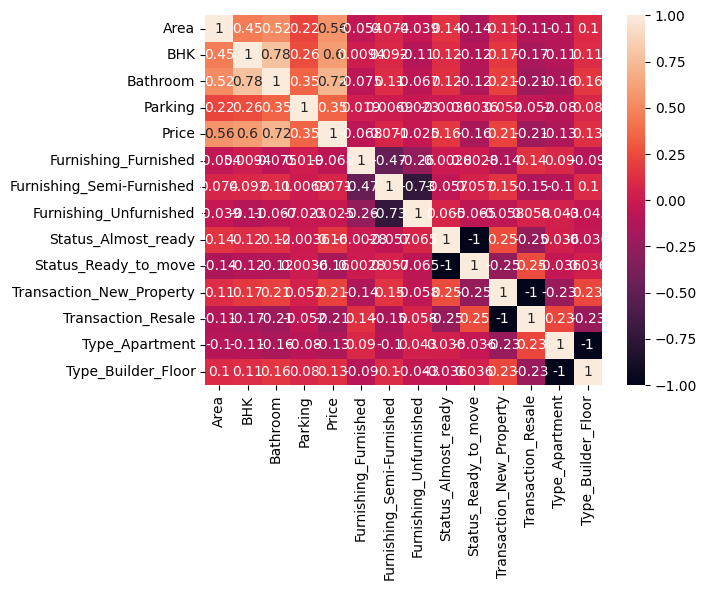

In [40]:
sns.heatmap(df1.corr(),annot=True)

In [41]:
df1.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Bathroom,0.715335
BHK,0.597242
Area,0.560270
Parking,0.347187
Transaction_New_Property,0.214590
Status_Almost_ready,0.158916
Type_Builder_Floor,0.129803
Furnishing_Semi-Furnished,0.070580
Furnishing_Unfurnished,-0.024743


In [56]:
Y = df1.Price
X = df1.drop('Price',axis=1)

In [61]:
X

,Area,BHK,Bathroom,Parking,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,0.032922,0.6,0.4,0.1,False,True,False,False,True,True,False,False,True
1,0.030864,0.4,0.4,0.1,False,True,False,False,True,True,False,True,False
2,0.039095,0.4,0.4,0.1,True,False,False,False,True,False,True,True,False
3,0.024691,0.4,0.4,0.1,False,True,False,False,True,False,True,False,True
4,0.026749,0.4,0.4,0.1,False,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.169465,0.8,1.0,0.3,False,False,True,False,True,True,False,False,True
1255,0.043210,0.6,0.4,0.3,False,True,False,False,True,False,True,False,True
1256,0.036008,0.6,0.6,0.3,False,True,False,False,True,True,False,False,True
1257,0.040741,0.4,0.4,0.1,False,False,True,False,True,False,True,False,True


In [52]:
Y

,Price
0,0.027083
1,0.020833
2,0.064583
3,0.017500
4,0.025833
...,...
1254,0.229167
1255,0.052083
1256,0.072917
1257,0.047917


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train

,Area,BHK,Bathroom,Parking,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
1095,0.055556,0.6,0.6,0.2,False,False,True,False,True,False,True,True,False
920,0.046296,0.4,0.4,0.2,False,False,True,False,True,False,True,False,True
433,0.039095,0.4,0.4,0.2,False,True,False,False,True,False,True,False,True
1255,0.043210,0.6,0.4,0.3,False,True,False,False,True,False,True,False,True
826,0.055556,0.6,0.6,0.1,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,0.115226,0.8,1.0,0.2,False,True,False,False,True,False,True,True,False
1121,0.032922,0.4,0.4,0.2,False,True,False,False,True,False,True,True,False
1156,0.057613,0.4,0.4,0.2,False,True,False,False,True,False,True,True,False
882,0.015597,0.2,0.2,0.1,False,False,True,False,True,False,True,False,True


In [69]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [70]:
pred

array([ 0.94010215, -1.0637142 ,  0.94010215,  0.94010215,  0.94010215,
       -1.0637142 , -1.0637142 , -1.0637142 ,  0.94010215,  0.94010215,
       -1.0637142 , -1.0637142 , -1.0637142 , -1.0637142 , -1.0637142 ,
        0.94010215, -1.0637142 ,  0.94010215,  0.94010215,  0.94010215,
        0.94010215,  0.94010215, -1.0637142 , -1.0637142 ,  0.94010215,
        0.94010215,  0.94010215,  0.94010215,  0.94010215,  0.94010215,
       -1.0637142 , -1.0637142 ,  0.94010215,  0.94010215, -1.0637142 ,
       -1.0637142 ,  0.94010215,  0.94010215,  0.94010215, -1.0637142 ,
        0.94010215, -1.0637142 ,  0.94010215,  0.94010215,  0.94010215,
        0.94010215,  0.94010215,  0.94010215,  0.94010215,  0.94010215,
        0.94010215,  0.94010215,  0.94010215,  0.94010215,  0.94010215,
        0.94010215, -1.0637142 ,  0.94010215,  0.94010215, -1.0637142 ,
        0.94010215, -1.0637142 ,  0.94010215,  0.94010215,  0.94010215,
       -1.0637142 , -1.0637142 , -1.0637142 , -1.0637142 , -1.06

In [71]:
print(f'Training Accuracy: {lr.score(X_train,y_train)}')
print(f'Testing Accuracy: {lr.score(X_test,y_test)}')

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [72]:
from math import sqrt

In [75]:
print(sqrt(mse(y_test,pred)))

9.728070885283976e-16


In [76]:
def DTR(x_train,y_train,x_test,y_test):
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print(sqrt(mse(y_test,pred)))

In [78]:
DTR(X_train,y_train,X_test,y_test)

8.380800296393991e-15


<Axes: xlabel='Area', ylabel='Price'>

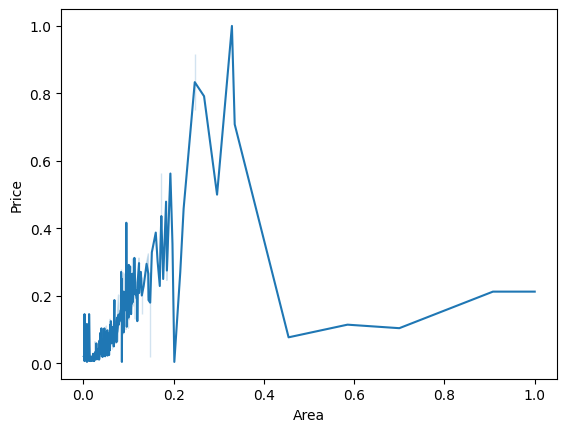

In [80]:
sns.lineplot(x=df1.Area,y=df1.Price)

<Axes: xlabel='Area', ylabel='Price'>

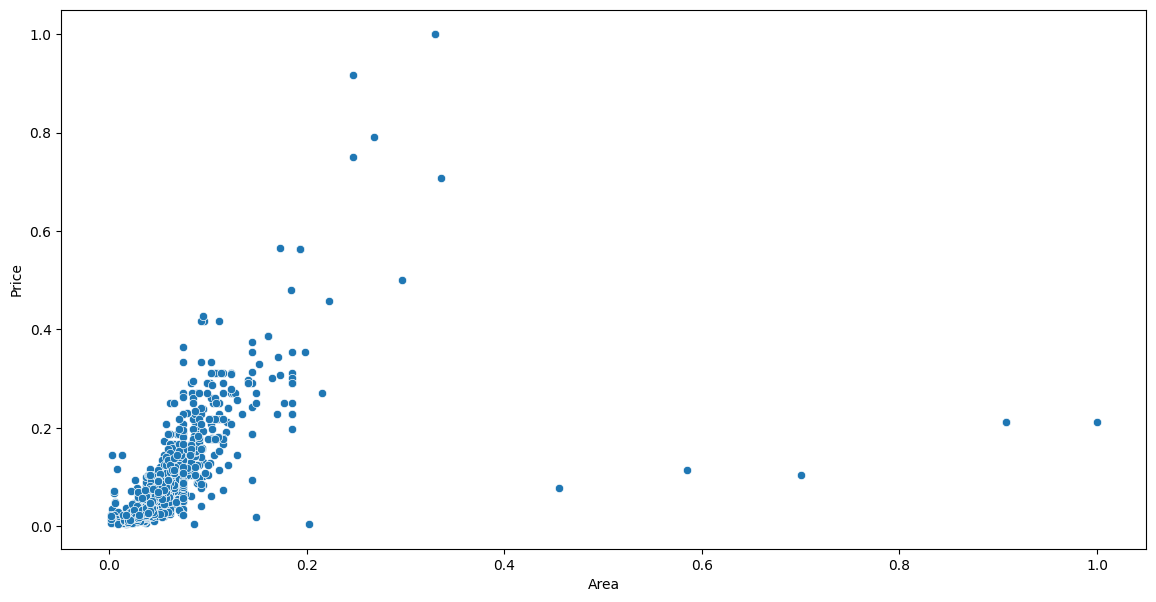

In [81]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df1.Area,y=df1.Price)

In [83]:
p = np.array(df1[df1.Area>0.3].index)
df1.drop(p,inplace=True)

<Axes: xlabel='Area', ylabel='Price'>

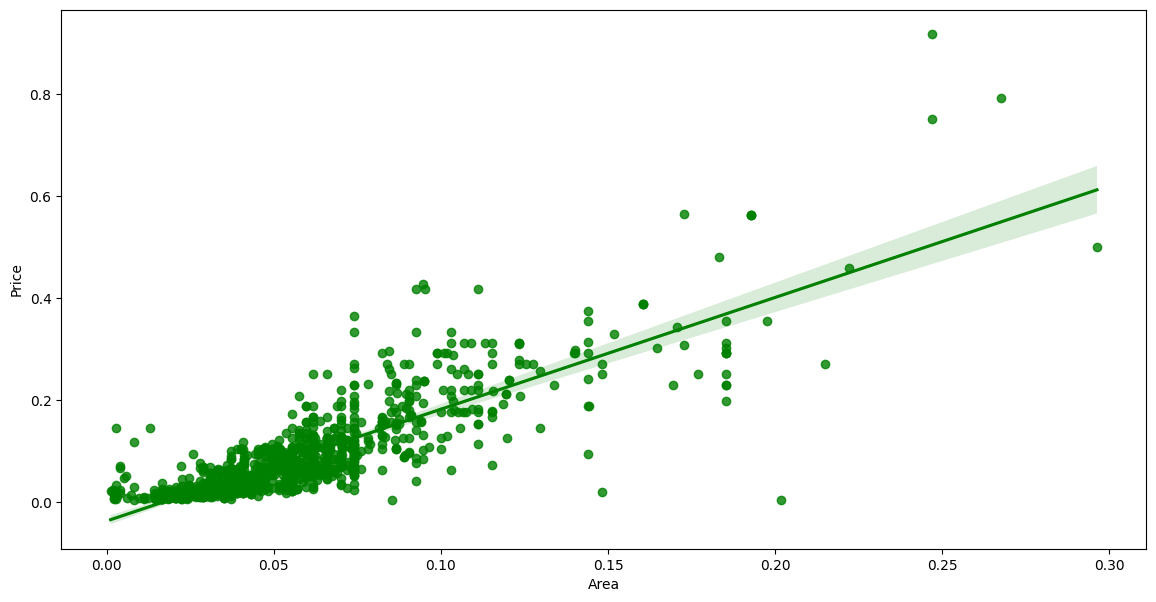

In [85]:
plt.figure(figsize=(14,7))
sns.regplot(x="Area", y="Price", data=df1,color='g')

In [86]:
Y = df1.Price
X = df1.drop('Price',axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
DTR(x_train,y_train,x_test,y_test)

0.047773128926653745


In [87]:
Y = df1.Price
X = df1.drop('Price',axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(sqrt(mse(y_test,pred)))

0.038736511853977515


In [99]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [106]:
def training_evaluation(actual,predicted):
  mse=mean_squared_error(actual,predicted)
  rmse=np.sqrt(mse)
  mae=mean_absolute_error(actual,predicted)
  r2=r2_score(actual,predicted)

  print(f'MSE is {mse}')
  print(f'RMSE is {rmse}')
  print(f'MAE is {mae}')
  print(f'Accuracy is {r2*100}')

  plt.scatter(actual,predicted,color='r')
  plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],color='k',lw=2,ls='--')
  plt.title('Scatter Plot of y_train vs y_pred_train')
  plt.xlabel('Actual Values (y_train)')
  plt.ylabel('Predicted Values (y_pred_train)')
  plt.show()

MSE is 0.002279996259835383
RMSE is 0.04774930638067304
MAE is 0.03037758020194274
Accuracy is 74.00384844327736


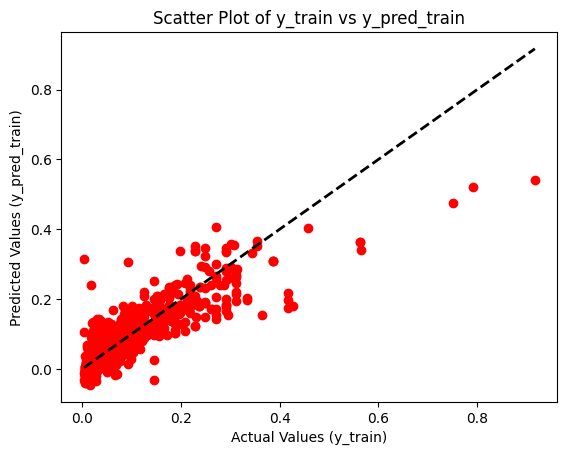

In [107]:
training_evaluation(y_train,y_pred_train)

In [114]:
def training_evaluation(actual,predicted):
  mse=mean_squared_error(actual,predicted)
  rmse=np.sqrt(mse)
  mae=mean_absolute_error(actual,predicted)
  r2=r2_score(actual,predicted)

  print(f'MSE is {mse}')
  print(f'RMSE is {rmse}')
  print(f'MAE is {mae}')
  print(f'Accuracy is {r2*100}')

  plt.scatter(actual,predicted,color='g')
  plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],color='k',lw=2,ls='--')
  plt.title('Scatter Plot of y_test vs y_pred_test')
  plt.xlabel('Actual Values (y_test)')
  plt.ylabel('Predicted Values (y_pred_test)')
  plt.show()

MSE is 0.0015005173506133407
RMSE is 0.038736511853977515
MAE is 0.026937282100340135
Accuracy is 79.07345675210541


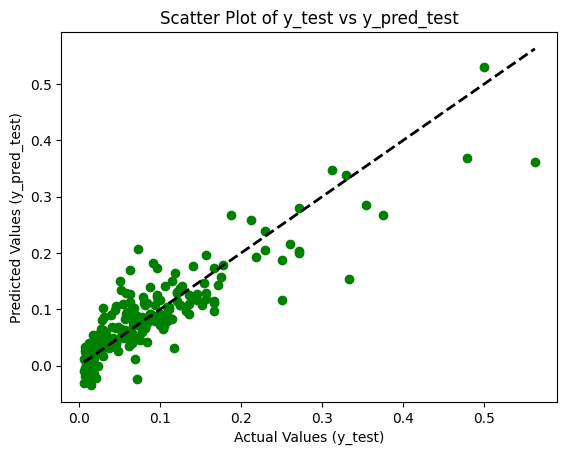

In [115]:
training_evaluation(y_test,y_pred_test)